# Notebook de exploração dos métodos de CLusterização

## TL;DR
Dentro deste notebook vamos explorar os tipos de notebooks existentes.

## Objetivo

Entender como executar cada método com os tipos de dados que temos.

## Dados
CSV's dos trials.


## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.



# Tipos de Métodos de Clusterização 


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Bloco 1 - K-Means tradicional com distância Euclidiana

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
# Bloco 2 - K-Means com distância DTW (tslearn)
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance



In [75]:
df = pd.read_csv('../../data/rafaelDB.csv')

### Plot dos dados

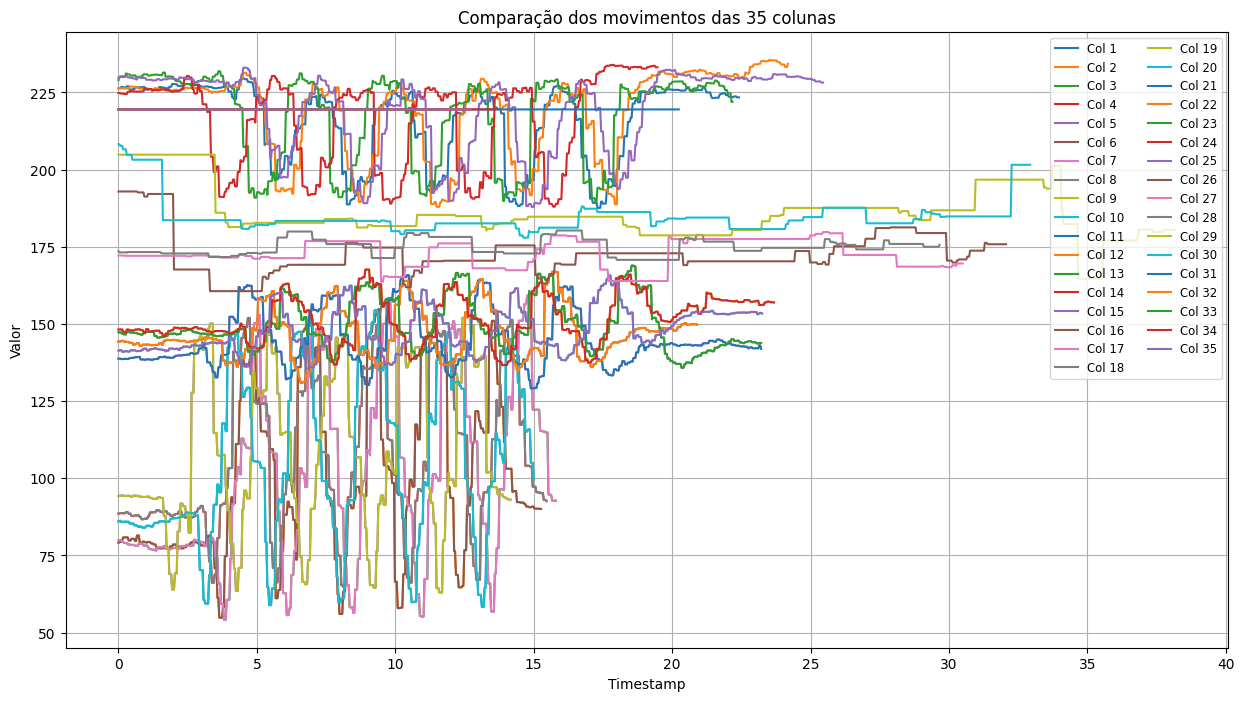

In [76]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

### Tratamento dos tamanhos das séries


In [86]:
# Separa timestamp e sensores
timestamp = df.iloc[:, 0]
dados = df.iloc[:, 1:]

# Conta valores não nulos (validos) por coluna (sensor)
valid_lengths = dados.notna().sum(axis=0)

# Identifica o menor tamanho válido
min_length = valid_lengths.min()

print(f"Menor tamanho válido: {min_length}")

# Corta todas as colunas para o menor tamanho
dados_cortados = dados.iloc[:min_length, :]

# Corta o timestamp também para manter alinhamento
timestamp_cortado = timestamp.iloc[:min_length]

# Reconstroi DataFrame final
df_final = pd.concat([timestamp_cortado.reset_index(drop=True), dados_cortados.reset_index(drop=True)], axis=1)

print(df_final.shape)
print(df_final.head())

Menor tamanho válido: 36
(36, 344)
        0         1         2         3         4         5         6    \
0   0.00000   0.03340   0.06680   0.10020   0.13360   0.16700   0.20040   
1  86.05160  86.05160  86.24536  85.88944  85.88944  85.88944  85.92782   
2  79.04637  79.42403  79.42403  79.42403  79.89925  80.83653  80.83653   
3  79.92158  79.92158  79.92158  79.92158  79.41667  79.41667  79.02091   
4  88.55168  88.55168  88.72372  88.72372  88.72372  88.67191  88.67191   

        7         8         9    ...        334        335        336  \
0   0.23380   0.26720   0.30060  ...   11.15560   11.18900   11.22240   
1  85.92782  85.92782  85.91203  ...   97.68756   97.68756  120.90460   
2  80.83653  80.84084  80.84084  ...  145.50160  145.50160  145.96920   
3  79.02091  79.02091  79.02091  ...   67.34228   92.91782   92.91782   
4  88.67191  89.01524  89.01524  ...  102.45950  102.45950  143.90810   

         337        338        339       340       341       342       343 

In [91]:
# Ajustar o DataFrame para que as séries fiquem em linhas e timestamps em colunas
data = df_final.set_index(df_final.columns[0])  # usa o timestamp como índice
data = data.T  # transpoe: linhas = séries, colunas = timestamps
data

,0.00000,86.05160,79.04637,79.92158,88.55168,94.18597,144.29860,138.76710,147.33920,148.20970,...,192.92480,172.19020,173.60040,204.84510,208.22560,219.51070,219.51070,219.51070,219.51070,219.51070
1,0.0334,86.05160,79.42403,79.92158,88.55168,94.36861,144.2986,138.7671,147.2379,148.2097,...,192.9248,172.1767,173.1956,204.8451,208.2256,219.5107,219.5107,219.5107,219.5107,219.5107
2,0.0668,86.24536,79.42403,79.92158,88.72372,94.36861,144.2986,138.7671,147.2379,148.2097,...,192.9248,172.1767,173.1956,204.8451,207.7024,219.5107,219.5107,219.5107,219.5107,219.5107
3,0.1002,85.88944,79.42403,79.92158,88.72372,94.36861,144.4738,138.6201,147.2379,148.2097,...,192.9248,172.1767,173.1956,204.8451,207.7024,219.5107,219.5107,219.5107,219.5107,219.5107
4,0.1336,85.88944,79.89925,79.41667,88.72372,94.40106,144.5396,138.6201,146.8200,148.2097,...,192.9248,172.1767,173.1956,204.8451,207.7024,219.5107,219.5107,219.5107,219.5107,219.5107
5,0.1670,85.88944,80.83653,79.41667,88.67191,94.40106,144.5396,138.6201,146.8200,147.5279,...,192.9248,172.1767,173.1956,204.8451,206.5803,219.5107,219.5107,219.5107,219.5107,219.5107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,11.3226,118.33170,147.59070,95.54456,148.16040,92.09328,143.8774,142.1710,146.9945,146.3020,...,170.3402,174.8275,178.1970,185.3432,180.3536,219.5107,219.5107,219.5107,219.5107,219.5107
340,11.3560,118.33170,147.59070,101.32170,148.16040,92.09328,143.8774,142.1710,146.9945,145.7640,...,170.3402,174.8275,178.1970,185.3432,180.3536,219.5107,219.5107,219.5107,219.5107,219.5107
341,11.3894,118.33170,147.59070,101.32170,148.04590,85.34341,143.8774,142.1710,153.5136,145.7640,...,170.3402,174.8275,178.1970,185.3432,180.3536,219.5107,219.5107,219.5107,219.5107,219.5107
342,11.4228,117.49330,151.48710,101.32170,148.04590,85.34341,143.8774,143.6132,153.5136,145.7640,...,170.3402,174.8275,178.1970,185.3432,180.3536,219.5107,219.5107,219.5107,219.5107,219.5107


## Bloco 1 - K-Means tradicional (distância Euclidiana)

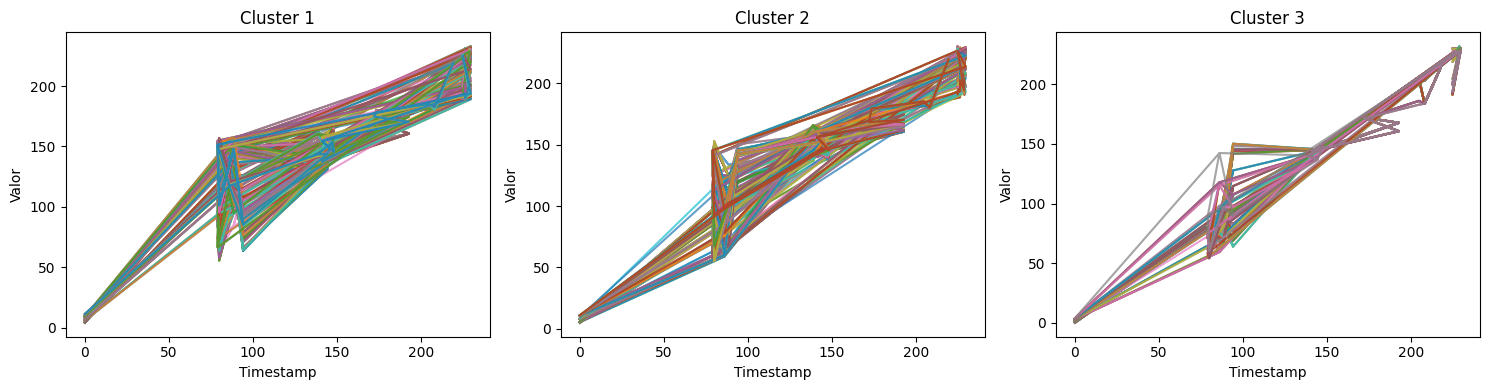

In [ ]:

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.values)

# Aplicar K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Plotagem dos clusters
timestamp = data.columns.values

fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 4), squeeze=False)

for cluster_id in range(n_clusters):
    ax = axes[0][cluster_id]
    indices = np.where(labels == cluster_id)[0]
    for i in indices:
        ax.plot(timestamp, data.iloc[i], alpha=0.7)
    ax.set_title(f'Cluster {cluster_id+1}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()


In [78]:
X = scaler.fit_transform(data.values)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

timestamp = data.columns.values
k = n_clusters
cmap = cm.get_cmap('tab20', k)

fig, axes = plt.subplots(1, k, figsize=(5 * k, 4), squeeze=False)

for cluster_id in range(k):
    ax = axes[0][cluster_id]
    indices = np.where(labels == cluster_id)[0]
    color = cmap(cluster_id)
    for i in indices:
        ax.plot(timestamp, data.iloc[i], color=color, alpha=0.7)
    ax.set_title(f'Cluster {cluster_id+1} (KMeans Euclidiana)')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()


C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: Found array with dim 3. KMeans expected <= 2.

## Bloco 2 - K-Means DTW (tslearn)

C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Yama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3

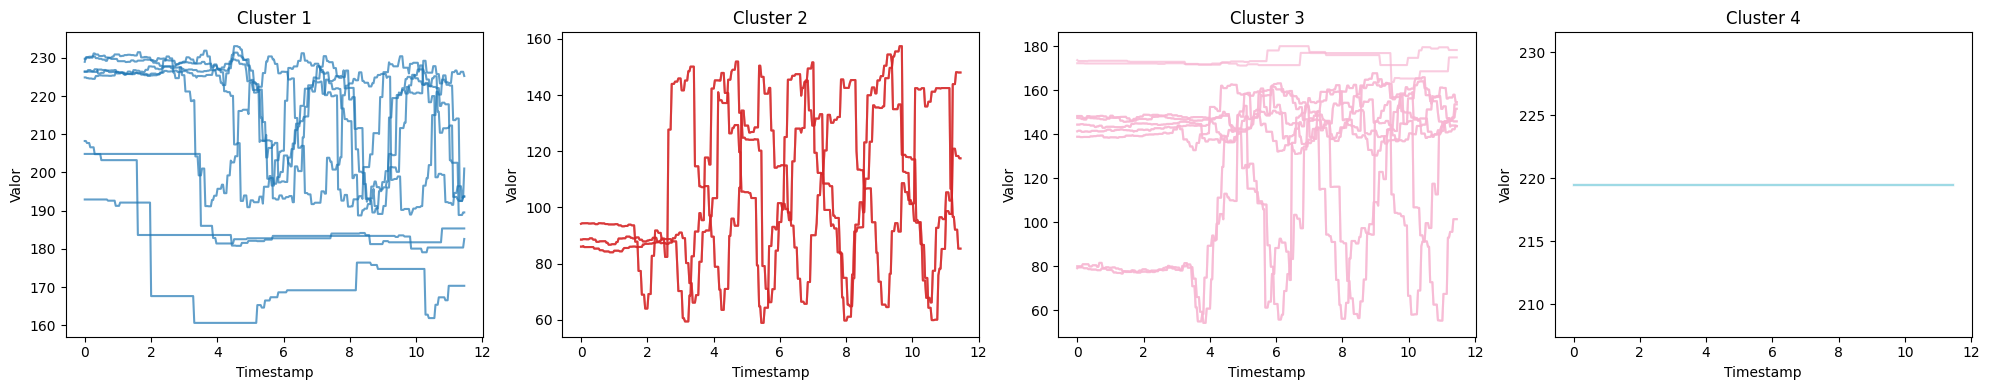

In [ ]:
# Preparar dados: converter para numpy array 3D (samples, timesteps, dim=1)
X_ts = data.values.astype(float)
X_ts = np.expand_dims(X_ts, axis=2)

# Normalizar séries
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_ts)

n_clusters = 4
km_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
labels = km_dtw.fit_predict(X_scaled)

# Preparar para plotagem
timestamp = data.columns.values
k = n_clusters
cmap = cm.get_cmap('tab20', k)

fig, axes = plt.subplots(1, k, figsize=(5 * k, 4), squeeze=False)

for cluster_id in range(k):
    ax = axes[0][cluster_id]
    indices = np.where(labels == cluster_id)[0]
    color = cmap(cluster_id)
    for i in indices:
        # Aqui plotamos os dados originais (não normalizados) para melhor interpretação visual
        ax.plot(timestamp, data.iloc[i], color=color, alpha=0.7)
    ax.set_title(f'Cluster {cluster_id+1}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

ValueError: Found array with dim 3. StandardScaler expected <= 2.

# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.